In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(72.0999134564832, 145.94344296185392),
 (52.167537038324014, 90.46396976160787),
 (-35.56287150228326, -97.8785622401941),
 (-72.10657199714825, -117.30677786835423),
 (38.59793179347278, 55.54033948184875),
 (39.27982884068146, -123.52570481609625),
 (-25.835498188022157, 14.111123050226212),
 (-60.542860810588266, -58.10540082337201),
 (78.251038782508, 3.244525450004147),
 (-35.631591588722465, 155.40904696540053),
 (-4.563418928072963, 117.5596964289171),
 (-8.741929478585135, 86.75097119117095),
 (-71.23183032071921, -99.9011781790015),
 (61.22431000156604, -137.05827900257933),
 (63.645007572170925, 132.98121246808438),
 (60.52277734102938, -12.442862885724878),
 (-5.982763666102031, 76.62958654619382),
 (-76.1516058459096, 124.9910149384209),
 (-25.322618110774002, 130.38531512232555),
 (-36.35510260188599, -6.366032275223432),
 (-32.18554826294548, -112.51015680084426),
 (-3.7924147638305072, 0.5437508463453753),
 (17.255383492386073, 155.16296138616497),
 (-76.12490400968507

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4bca05dc20577de1febcac60150c6315"

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | abaza
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | gazanjyk
Processing Record 6 of Set 1 | ukiah
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | nelson bay
Processing Record 11 of Set 1 | majene
Processing Record 12 of Set 1 | padang
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | churapcha
Processing Record 15 of Set 1 | hofn
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | yulara
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | port-gentil
Processing Record 22 of Set 1 | kavieng
Processing Reco

Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | saint-georges
Processing Record 43 of Set 4 | stoyba
City not found. Skipping...
Processing Record 44 of Set 4 | mookane
Processing Record 45 of Set 4 | fortuna foothills
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | hamilton
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | norman wells
Processing Record 1 of Set 5 | tomatlan
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | dongsheng
Processing Record 4 of Set 5 | togur
Processing Record 5 of Set 5 | the valley
Processing Record 6 of Set 5 | inuvik
Processing Record 7 of Set 5 | sao jose da coroa grande
Processing Record 8 of Set 5 | malartic
Processing Record 9 of Set 5 | nikolskoye
Processing Record 10 of Set 5 | santa maria
Processing Record 11 of Set 5 | buin
Processing Record 12 of Set 5 | halifax
Processing Record 13 of Set 5 | lumeje
Processin

Processing Record 30 of Set 8 | tuatapere
Processing Record 31 of Set 8 | sechura
Processing Record 32 of Set 8 | lakhnadon
Processing Record 33 of Set 8 | yashan
Processing Record 34 of Set 8 | cortez
Processing Record 35 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 36 of Set 8 | severnoye
Processing Record 37 of Set 8 | sandovo
Processing Record 38 of Set 8 | tefe
Processing Record 39 of Set 8 | bandarbeyla
Processing Record 40 of Set 8 | talas
Processing Record 41 of Set 8 | dunedin
Processing Record 42 of Set 8 | ramhormoz
Processing Record 43 of Set 8 | hay river
Processing Record 44 of Set 8 | aklavik
Processing Record 45 of Set 8 | bodden town
Processing Record 46 of Set 8 | vao
Processing Record 47 of Set 8 | davidson
Processing Record 48 of Set 8 | dalbandin
Processing Record 49 of Set 8 | beringovskiy
Processing Record 50 of Set 8 | lompoc
Processing Record 1 of Set 9 | mende
Processing Record 2 of Set 9 | dolores
Processing Record 3 of Set 

Processing Record 22 of Set 12 | jiwani
Processing Record 23 of Set 12 | senador guiomard
Processing Record 24 of Set 12 | riachao das neves
Processing Record 25 of Set 12 | dejen
Processing Record 26 of Set 12 | deputatskiy
Processing Record 27 of Set 12 | usta muhammad
Processing Record 28 of Set 12 | moose factory
Processing Record 29 of Set 12 | siva
Processing Record 30 of Set 12 | hit
Processing Record 31 of Set 12 | fuerte olimpo
Processing Record 32 of Set 12 | ribnica
Processing Record 33 of Set 12 | palanga
Processing Record 34 of Set 12 | zhezkazgan
Processing Record 35 of Set 12 | oskarshamn
Processing Record 36 of Set 12 | tuy hoa
Processing Record 37 of Set 12 | sosnovoborsk
Processing Record 38 of Set 12 | horta
Processing Record 39 of Set 12 | kodinsk
Processing Record 40 of Set 12 | kasongo-lunda
Processing Record 41 of Set 12 | sept-iles
Processing Record 42 of Set 12 | sioux lookout
Processing Record 43 of Set 12 | henties bay
Processing Record 44 of Set 12 | araouan

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,8.13,94,83,4.45,RU,2020-10-21 16:11:27
1,Abaza,52.66,90.09,38.37,75,90,5.01,RU,2020-10-21 16:11:27
2,Lebu,-37.62,-73.65,53.71,65,0,16.58,CL,2020-10-21 16:11:27
3,Punta Arenas,-53.15,-70.92,46.40,49,90,16.11,CL,2020-10-21 16:11:28
4,Gazanjyk,39.24,55.52,59.83,33,73,8.99,TM,2020-10-21 16:10:09
5,Ukiah,39.15,-123.21,61.00,81,1,1.83,US,2020-10-21 16:11:28
6,Luderitz,-26.65,15.16,77.14,28,0,18.19,NA,2020-10-21 16:11:28
7,Ushuaia,-54.80,-68.30,48.20,49,90,21.92,AR,2020-10-21 16:11:28
8,Nelson Bay,-32.72,152.15,63.00,77,75,4.70,AU,2020-10-21 16:11:29
9,Majene,-3.54,118.97,80.38,82,4,5.57,ID,2020-10-21 16:11:29


In [10]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2020-10-21 16:11:27,70.63,147.92,8.13,94,83,4.45
1,Abaza,RU,2020-10-21 16:11:27,52.66,90.09,38.37,75,90,5.01
2,Lebu,CL,2020-10-21 16:11:27,-37.62,-73.65,53.71,65,0,16.58
3,Punta Arenas,CL,2020-10-21 16:11:28,-53.15,-70.92,46.40,49,90,16.11
4,Gazanjyk,TM,2020-10-21 16:10:09,39.24,55.52,59.83,33,73,8.99
5,Ukiah,US,2020-10-21 16:11:28,39.15,-123.21,61.00,81,1,1.83
6,Luderitz,NA,2020-10-21 16:11:28,-26.65,15.16,77.14,28,0,18.19
7,Ushuaia,AR,2020-10-21 16:11:28,-54.80,-68.30,48.20,49,90,21.92
8,Nelson Bay,AU,2020-10-21 16:11:29,-32.72,152.15,63.00,77,75,4.70
9,Majene,ID,2020-10-21 16:11:29,-3.54,118.97,80.38,82,4,5.57


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [16]:
import time
today = time.strftime("%x")
today

'10/21/20'

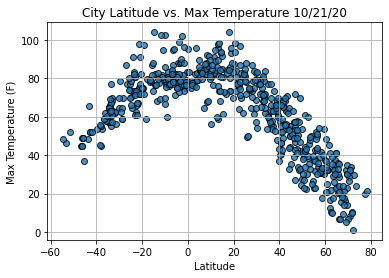

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

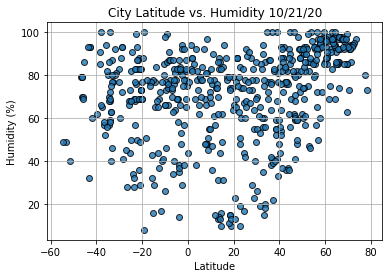

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

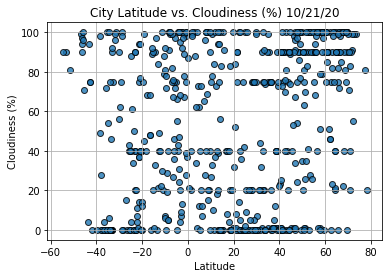

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()